# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
! https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Apple%20Stock%20Price.csv

/bin/bash: https://raw.githubusercontent.com/DriveMyScream/Stock_price_prediction/main/Apple%20Stock%20Price.csv: No such file or directory


# data Loading

In [3]:
data_path = "/content/Apple Stock Price.csv"
dataset = pd.read_csv(data_path, parse_dates=['Date'])
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,2023-05-11,173.850,174.59,172.17,173.750,49514680
1,2023-05-10,173.020,174.03,171.90,173.555,53724500
2,2023-05-09,173.050,173.54,171.60,171.770,45326871
3,2023-05-08,172.480,173.85,172.11,173.500,55962793
4,2023-05-05,170.975,174.30,170.76,173.570,113453203


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1349 non-null   datetime64[ns]
 1    Open    1349 non-null   float64       
 2    High    1349 non-null   float64       
 3    Low     1349 non-null   float64       
 4    Close   1349 non-null   float64       
 5    Volume  1349 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 63.4 KB


In [5]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03
mean,101.696094,102.929712,100.547024,101.794234,1.134729e+08
std,46.894258,47.484211,46.329266,46.938088,5.497331e+07
min,35.995000,36.430000,35.500000,35.547500,3.519586e+07
25%,51.840000,52.275000,51.357500,51.870000,7.649923e+07
50%,114.010000,115.550000,112.250000,113.850000,9.844480e+07
75%,145.810000,147.519900,144.460000,146.100000,1.337871e+08
max,182.630000,182.940000,179.120000,182.010000,4.268848e+08


In [6]:
dataset.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

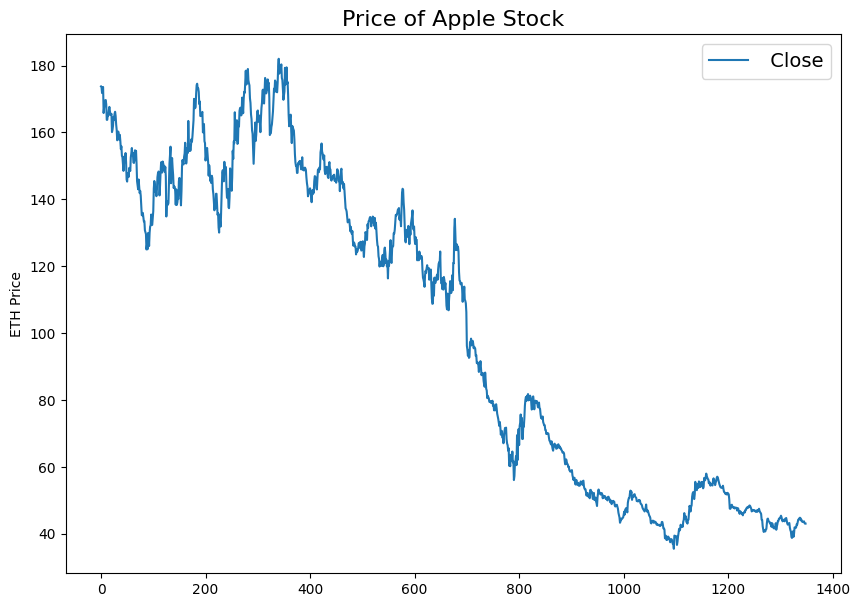

In [8]:
import matplotlib.pyplot as plt
dataset[' Close'].plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of Apple Stock", fontsize=16)
plt.legend(fontsize=14);

In [9]:
price_data = dataset[' Close'].values
price_data

array([173.75  , 173.555 , 171.77  , ...,  43.2575,  43.0575,  43.065 ])

In [10]:
price_data.shape

(1349,)

In [11]:
train_data, test_data = price_data[0:1200], price_data[1200:]

In [12]:
train_data.shape, test_data.shape

((1200,), (149,))

In [13]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [14]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1192, 7), (1192,), (141, 7), (141,))

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1192, 7, 1)
(141, 7, 1)


In [17]:
X_train[0]

array([[173.75 ],
       [173.555],
       [171.77 ],
       [173.5  ],
       [173.57 ],
       [165.79 ],
       [167.45 ]])

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [19]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                        

In [21]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [22]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
34/34 [==============================] - 7s 36ms/step - loss: 15051.5879 - mae: 115.1715 - val_loss: 2413.1765 - val_mae: 48.6109
Epoch 2/30
34/34 [==============================] - 1s 18ms/step - loss: 14986.9688 - mae: 114.8422 - val_loss: 2328.6650 - val_mae: 47.7189
Epoch 3/30
34/34 [==============================] - 1s 17ms/step - loss: 14546.9619 - mae: 112.2832 - val_loss: 1321.9628 - val_mae: 35.1076
Epoch 4/30
34/34 [==============================] - 1s 20ms/step - loss: 9880.6924 - mae: 90.0353 - val_loss: 1621.6030 - val_mae: 35.9661
Epoch 5/30
34/34 [==============================] - 1s 21ms/step - loss: 4275.7573 - mae: 52.8011 - val_loss: 173.3478 - val_mae: 12.3802
Epoch 6/30
34/34 [==============================] - 1s 20ms/step - loss: 3070.7031 - mae: 46.3106 - val_loss: 335.5136 - val_mae: 13.1866
Epoch 7/30
34/34 [==============================] - 1s 20ms/step - loss: 3061.7947 - mae: 44.0503 - val_loss: 378.4564 - val_mae: 13.9706
Epoch 8/30
34/34 [======

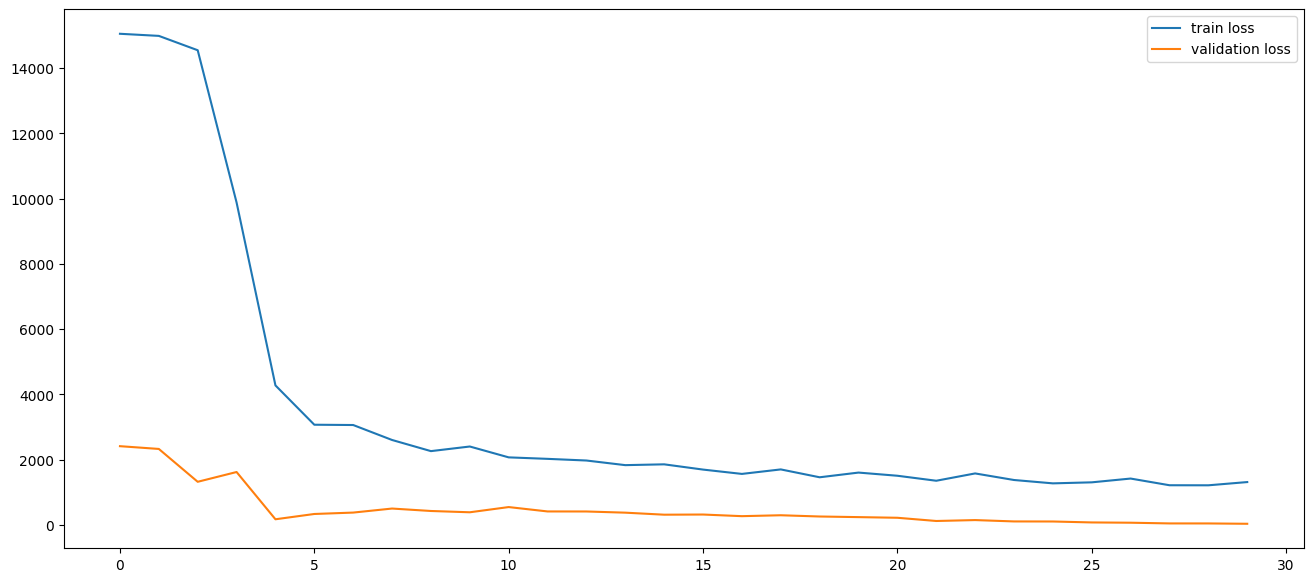

In [23]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


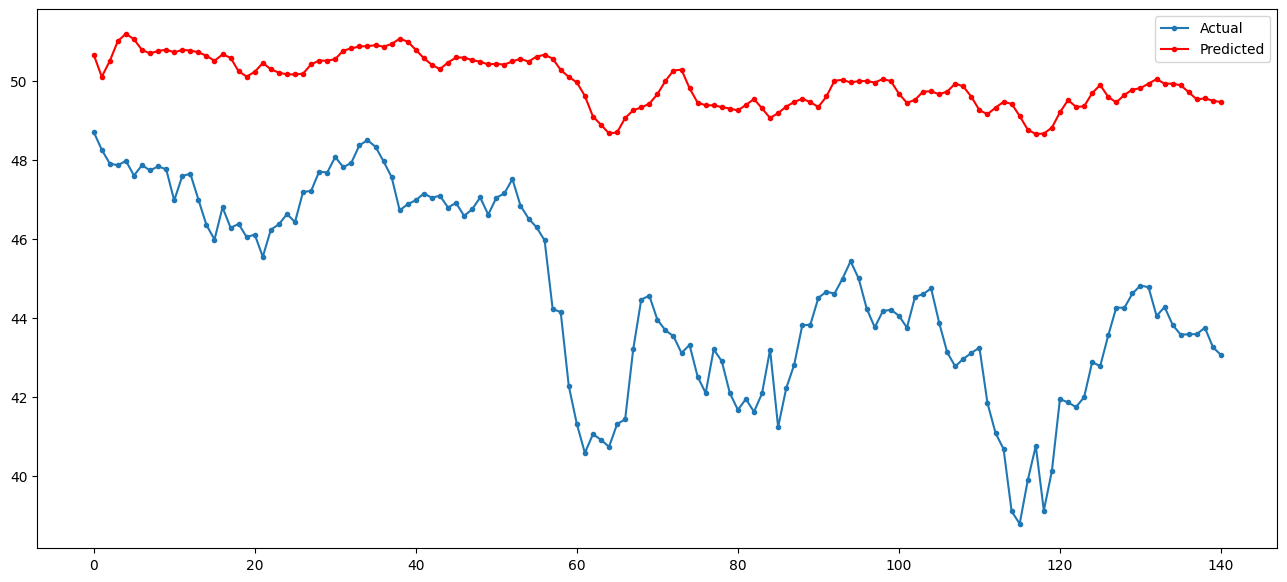

In [25]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 7.072652703685887
Train MAE: 2.3721545406549858
Test RMSE: 5.666903547263067
Test MAE: 2.310584655270984


# at Inference

In [27]:
model.save("Apple_Stock_Price_Prediction")

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
model = tf.keras.saving.load_model("/content/Apple_Stock_Price_Prediction")

In [31]:
%cp -av /content/Apple_Stock_Price_Prediction /content/drive/MyDrive/Stock_Price_Prediction

'/content/Apple_Stock_Price_Prediction' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction'
'/content/Apple_Stock_Price_Prediction/variables' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction/variables'
'/content/Apple_Stock_Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Apple_Stock_Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction/variables/variables.index'
'/content/Apple_Stock_Price_Prediction/assets' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction/assets'
'/content/Apple_Stock_Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Stock_Price_Prediction/Apple_Stock_Price_Prediction/fingerprint.pb'
'/content/Apple_Stock_Price_Prediction/saved_model.pb' -> '/content/drive/MyDrive/St

In [32]:
X_test[0].shape

(7, 1)

In [33]:
prices = np.array([[173.75 ],
       [173.555],
       [171.77 ],
       [173.5  ],
       [173.57 ],
       [165.79 ],
       [167.45 ]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 1s 747ms/step
Prediction Price:  175.13193


In [34]:
print("Predicted Apple Stock Price: {0:.2f} ".format(prediction_price))

Predicted Apple Stock Price: 175.13 


In [ ]:
tf.__version__

'2.12.0'